# Investigating Student Engagement

## *Ammad Qureshi, Kyle Chandrasena, Nicholas Lachhman*

#### *Problem*: The factors affecting student engagement across American school districts.

In [146]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import os

warnings.filterwarnings("ignore")  # Suppress all warnings

### Loading the data for district and product information
The datasets for our investigation are various csv files. The <code>products_info.csv</code> file will be loaded into a dataframe that will be cleaned for use in our investigation. From the <code>districts_info.csv</code> file we will load all rows containing state values that are either California, Connecticut, Illinois, Indiana, Washington, or North Carolina as these states are the focus of our investigation. 

### Cleaning the data for the district and product dataframes
We can use the dropna() method to drop any rows with NaN values in our datasets. First we can check the <code>product_data<code> dataframe and the <code>districts_data<code> dataframe for any NaN values and use our cleaning procedure if it is needed. This cleaning procedure should remove all rows without useable data.

In [125]:
def remove_nan_rows(df):
    # Check if any rows have NaN values in any column
    has_na = df.isna().any(axis=1)
    
    if has_na.any():
        df = df.dropna()
#         print("removed NaN rows")
        return df
    else:
#         print("did not remove NaN rows")
        return df
# Read in the products_info.csv file and print the head of the df with its original length 
product_data = pd.read_csv("./Midterm/products_info.csv")
print(product_data.head())
product_len = len(product_data)
print("\n")
print(f"The product_data dataframe has {product_len} unique products")
print("\n")

# Define the list of states we're interested in
states_of_interest = ['California', 'Connecticut', 'Illinois', 'Indiana', 'Washington', 'North Carolina']

# Read in the districts_info.csv file and print the head of the df with its original length 
districts_info = pd.read_csv('Midterm/districts_info.csv')

# Filter the districts_info dataframe to only include rows for the states of interest and the columns needed for analysis
districts_w_all_data = districts_info[districts_info['state'].isin(states_of_interest)]
districts_data = districts_w_all_data.drop(['pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'], axis=1)

print(districts_data.head())
district_len = len(districts_data)
print("\n")
print(f"The districts_data dataframe has {district_len} unique districts")
print("\n")

# Apply the remove_nan_rows function to the product_data dataframe
print("Status for product_data dataframe:")
product_data = remove_nan_rows(product_data)
product_len = len(product_data)
print((f"After cleaning the product_data dataframe, it now has {product_len} unique products needed for our investigation"))
print("\n")

# Apply the remove_rows_with_nan function to the districts_data dataframe
print("Status for districts_data dataframe:")
districts_data = remove_nan_rows(districts_data)
if (district_len > len(districts_data)):
    print((f"After cleaning the districts_data dataframe, it now has {district_len} unique districts needed for our investigation"))
else:
    print((f"The districts_data dataframe did not have any rows without useable data and did not need to be cleaned. \nIt contains {district_len} unique districts needed for our investigation"))
print("\n")

   LP ID                           URL  Product Name  Provider/Company Name  \
0  13117    https://www.splashmath.com   SplashLearn          StudyPad Inc.   
1  66933          https://abcmouse.com  ABCmouse.com  Age of Learning, Inc    
2  50479         https://www.abcya.com        ABCya!         ABCya.com, LLC   
3  92993         http://www.aleks.com/         ALEKS    McGraw-Hill PreK-12   
4  73104  https://www.achieve3000.com/   Achieve3000            Achieve3000   

            Sector(s)                         Primary Essential Function  
0             PreK-12                    LC - Digital Learning Platforms  
1             PreK-12                    LC - Digital Learning Platforms  
2             PreK-12  LC - Sites, Resources & Reference - Games & Si...  
3  PreK-12; Higher Ed                    LC - Digital Learning Platforms  
4             PreK-12                    LC - Digital Learning Platforms  


The product_data dataframe has 372 unique products


    district_id     

In [126]:
product_data

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,"LC - Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,CM - Teacher Resources - Professional Learning
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


### Loading the data for student engagement 
In our new <code>districts_data<code> dataframe, each row belongs to one of the states we are investigating and they are designated to a district_id that is the file name for a student engagement file in the <code>engagement_data</code> folder. We need to have separate dataframes for each state of our investigation and they will contain the combined student engagement data for all files that have a district_id that matches a state.
    
### Cleaning the data for the district and product dataframes
The student engagement dataframes for each state will have NaN values in the engagement_index column as not every product could be used in every district, thus we will remove the rows with NaN values. Using the cleaning procedure that was used on the product and district dataframes, we should be able to remove all rows without useable data.

In [127]:
# Create an empty dictionary to store the dataframes for each state
state_eng_data = {}

# Loop through each state and load the corresponding engagement data into a dataframe
for state in districts_data["state"].unique().tolist():
    district_ids = districts_data[districts_data['state'] == state]['district_id'].tolist()
    state_eng_data[state] = pd.DataFrame()
    for district_id in district_ids:
        file_path = os.path.join('Midterm/engagement_data', f'{district_id}.csv')
        if os.path.isfile(file_path):
            district_eng_data = pd.read_csv(file_path)
            district_eng_data['district_id'] = district_id # Add column to identify which district each row belongs to
            district_eng_data["time"] = pd.to_datetime(district_eng_data["time"]) 
            
            # Remove rows that have an lp_id value that doesn't correspond to a value in the LP ID column of the product_data df
            district_eng_data = district_eng_data[district_eng_data['lp_id'].isin(product_data['LP ID'])]
            
            state_eng_data[state] = pd.concat([state_eng_data[state], district_eng_data])
        
        state_eng_data[state] = remove_nan_rows(state_eng_data[state])
        state_eng_data[state]['lp_id'] = state_eng_data[state]['lp_id'].apply(lambda x: int(x))

# Print out the first row with a unique district_id from each state's engagement data
for state, eng_data in state_eng_data.items():
    num_districts = eng_data['district_id'].nunique()
    print(f"There are {num_districts} unique district_id values in {state}.")
    print("\n")
    district_first_rows = eng_data.groupby('district_id').head(1)
    print(district_first_rows)
    print("\n")

There are 18 unique district_id values in Illinois.


         time  lp_id  pct_access  engagement_index  district_id
0  2020-01-27  32213      100.00           3000.00         8815
13 2020-02-12  47364       50.00           3000.00         1877
0  2020-01-01  45005        0.02              0.21         2779
0  2020-01-01  73101        0.01              0.10         9043
0  2020-01-01  92844        1.00             50.96         6577
0  2020-01-01  49751        0.00              0.22         8784
0  2020-01-01  24711        0.01             92.34         2601
0  2020-01-01  79673        0.04              0.72         9899
8  2020-01-01  49521        0.01              0.32         4629
2  2020-02-21  85975        0.72            109.72         1712
0  2020-02-28  44025        0.50             10.05         5042
1  2020-01-01  64947        0.02              4.22         5890
0  2020-01-01  41581        0.03              0.27         9553
0  2020-01-01  35201        0.02             21.97

### Data transformation / creating new columns 
After loading and cleaning our data, we may need to transform some data for use in our investigation. Specifically, the pct_black/hispanic column in the <code>districts_data<code> dataframe stores list like values for the percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data. We will store the first value in a column for the perecentage of students in the districts identified as Black and we will store the second value in a column for the perecentage of students in the districts identified as Hispanic.

In [128]:
# Split the values in pct_black/hispanic column into two separate columns
districts_data[['pct_black', 'pct_hispanic']] = districts_data['pct_black/hispanic'].str.split(',', expand=True)

# Remove the opening bracket from pct_black column
districts_data['pct_black'] = districts_data['pct_black'].str.replace('[','').astype(float)

# Remove the closing bracket and whitespace from pct_hispanic column
districts_data['pct_hispanic'] = districts_data['pct_hispanic'].str.replace(']','').str.strip().astype(float)

districts_data.drop('pct_black/hispanic', axis=1, inplace=True)

districts_data

,district_id,state,locale,pct_black,pct_hispanic
0,8815,Illinois,Suburb,0.0,0.2
7,7177,North Carolina,Suburb,0.2,0.4
9,6584,North Carolina,Rural,0.4,0.6
11,7457,Washington,City,0.4,0.6
12,1904,Connecticut,Rural,0.0,0.2
...,...,...,...,...,...
211,5934,Connecticut,Rural,0.0,0.2
221,2201,Connecticut,City,0.4,0.6
227,1705,Washington,City,0.2,0.4
231,7975,California,City,0.6,0.8


## Question 1: How does ethnicity and geographic region affect student engagement?

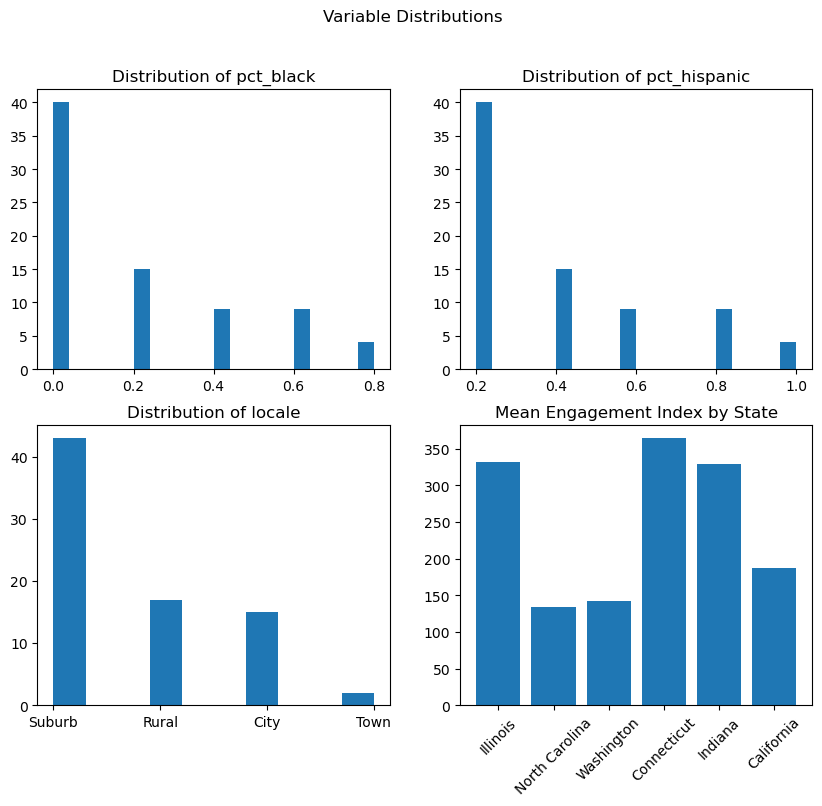

In [129]:
# Before answering this question we should create visuals for the distributions of the variables involved
# districts_data variables needed: pct_black, pct_hispanic, locale
# state_eng_data (district engagement data) variables needed: engagement_index

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the distribution of pct_black
axs[0, 0].hist(districts_data['pct_black'], bins=20)
axs[0, 0].set_title('Distribution of pct_black')

# Plot the distribution of pct_hispanic
axs[0, 1].hist(districts_data['pct_hispanic'], bins=20)
axs[0, 1].set_title('Distribution of pct_hispanic')

# Plot the distribution of locale
axs[1, 0].hist(districts_data['locale'])
axs[1, 0].set_title('Distribution of locale')

# Create a list of the mean engagement index for each state
mean_engagement_index = []
for state in state_eng_data:
    mean_engagement_index.append(state_eng_data[state]['engagement_index'].mean())

# Plot the mean engagement index for each state in a bar chart
axs[1, 1].bar(np.arange(len(mean_engagement_index)), mean_engagement_index)
axs[1, 1].set_xticks(np.arange(len(mean_engagement_index)))
axs[1, 1].set_xticklabels(state_eng_data.keys(), rotation= 45)
axs[1, 1].set_title('Mean Engagement Index by State')

# Add a title to the overall figure
fig.suptitle('Variable Distributions')

# Show the plot
plt.show()

district_id
1052    394.157382
1712    341.873207
1877    280.479016
2285    449.306659
2393    284.917236
2601    165.372714
2779    480.105723
3248    595.585848
4629    315.725668
5042    113.767746
5890    430.419037
6577    288.912139
8784    167.335563
8815    483.606632
8937    307.844986
9043    207.157871
9553    518.323925
9899    375.064128
Name: engagement_index, dtype: float64


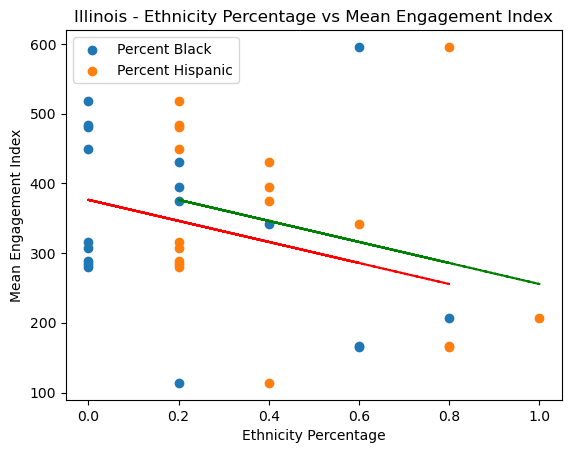

district_id
3558    143.124510
6584    221.550527
7177    109.774832
7767     56.183116
Name: engagement_index, dtype: float64


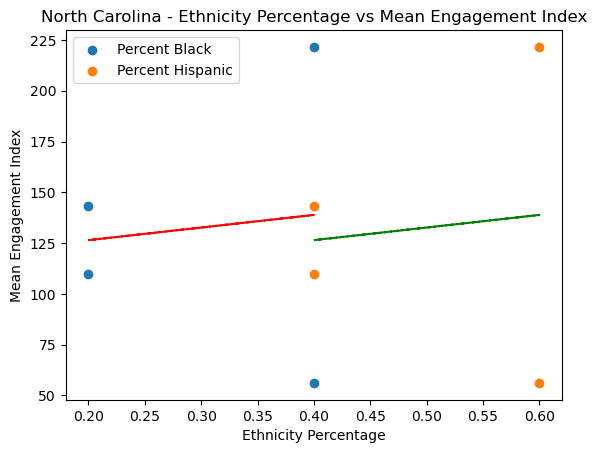

district_id
1705    182.333308
2130    105.308949
2167    294.031543
2567     90.885628
5510     83.851637
7457    165.571552
Name: engagement_index, dtype: float64


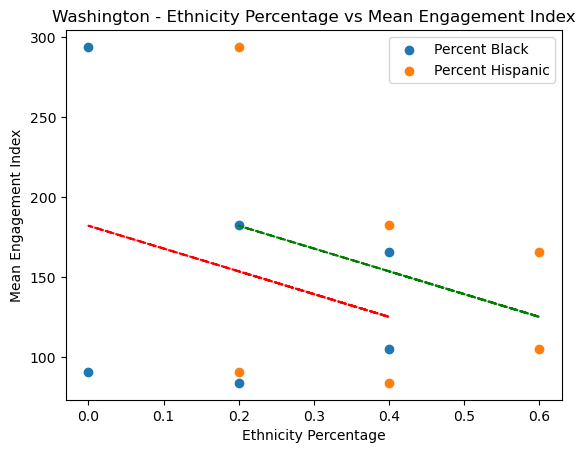

district_id
1000    246.932958
1142    706.291530
1444    556.628768
1450    281.498434
1558    271.305257
1904    570.334821
2201    243.729619
2729    426.974357
3314    393.280231
3640    373.355703
3936    606.500350
4031    374.445056
4083    362.067199
4516    243.949715
4520    411.063609
4569    192.675574
4602    711.464748
5802    348.967309
5934    481.579128
6046    426.701468
6055    731.228072
6194    363.044277
6250    485.081621
6998    474.896043
7785    338.202195
8076    189.695808
8127    434.964717
8539    289.577268
9140    433.509216
9589    247.587877
Name: engagement_index, dtype: float64


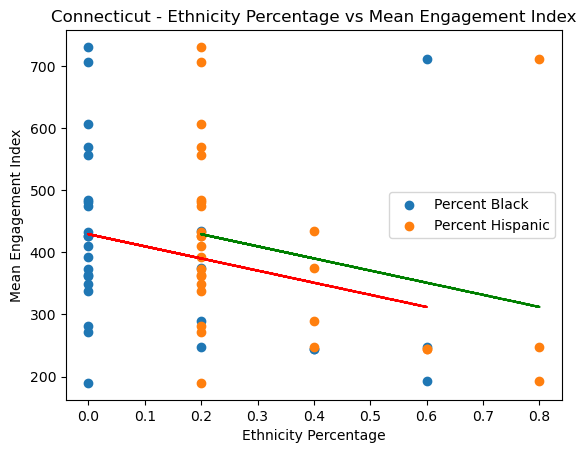

district_id
1324    411.884679
1536    412.926769
2870     99.661494
3222    181.880313
3228    375.376810
4808    669.672411
5627    368.854697
Name: engagement_index, dtype: float64


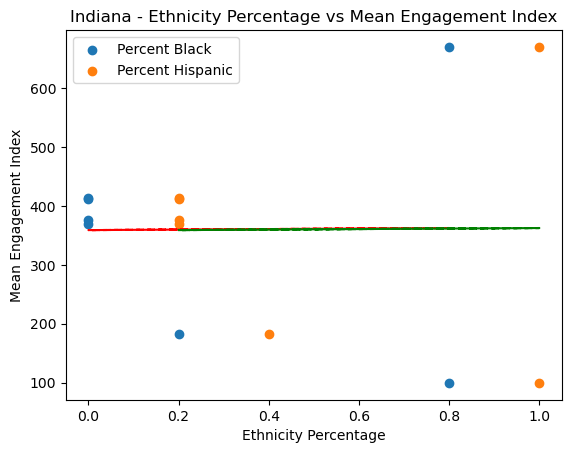

district_id
1570    159.872205
2074     89.432353
2106    111.557230
2172    592.707471
2321    624.785775
3322    102.769774
3412    246.952054
4550    206.440734
5604    211.225796
7164     88.928109
7975    111.963282
9357    236.124386
Name: engagement_index, dtype: float64


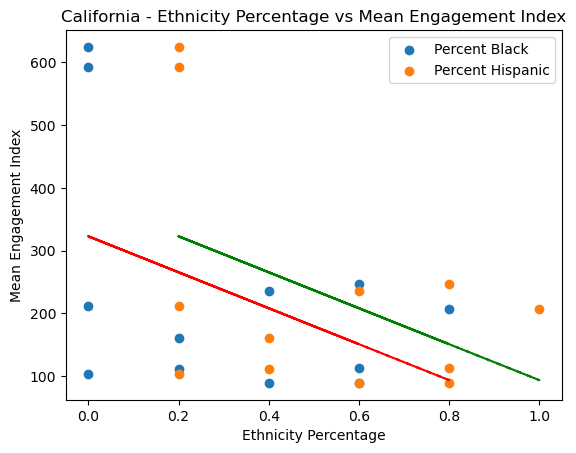

In [151]:
# First we will find any relationship between the pecentage of students who identify as Black or Hispanic and overall student engagement

# Loop through each state
for state in districts_data["state"].unique().tolist():

    # Get the state data from state_eng_data
    state_data = state_eng_data[state]

    # Group state data by district and calculate mean engagement index
    district_means = state_data.groupby('district_id')['engagement_index'].mean()
    
    print(district_means)

    # Merge with districts_data
    merged_data = pd.merge(districts_data[districts_data['state']==state], district_means, on='district_id')

    # Create scatter plot
    fig, ax = plt.subplots()
    ax.scatter(merged_data['pct_black'], merged_data['engagement_index'], label='Percent Black')
    ax.scatter(merged_data['pct_hispanic'], merged_data['engagement_index'], label='Percent Hispanic')
    ax.set_xlabel('Ethnicity Percentage')
    ax.set_ylabel('Mean Engagement Index')
    ax.set_title(f'{state} - Ethnicity Percentage vs Mean Engagement Index')
    ax.legend()
    
    # Adding trend line
    z = np.polyfit(merged_data['pct_black'], merged_data['engagement_index'], 1)
    p = np.poly1d(z)
    ax.plot(merged_data['pct_black'], p(merged_data['pct_black']), "r--")

    z = np.polyfit(merged_data['pct_hispanic'], merged_data['engagement_index'], 1)
    p = np.poly1d(z)
    ax.plot(merged_data['pct_hispanic'], p(merged_data['pct_hispanic']), "g--")

    plt.show()


From our initial analysis, the graphs suggest that states like Illinois, Washington, Connecticut and California have downward trends. This suggests that in these states when the ethnicity percentage for students identifying as Black or Hispanic increases, the mean student engagement decreases. From this trend we might suggest that school districts in these states consider different online learning tools or possible alternatives that can increase student engagement in these minority groups.
In contrast, states such as North Carolina and Indiana have upward trends that suggest that as the ethnicity percentage for students identifying as Black or Hispanic increases, the mean student engagement increases. From this trend we may suggest that school districts in these states continue to use their current set of online learning tools as they are producing positive results.

Illinois locale means:
locale
Rural     363.616046
Suburb    326.746240
Town      113.767746
Name: engagement_index, dtype: float64


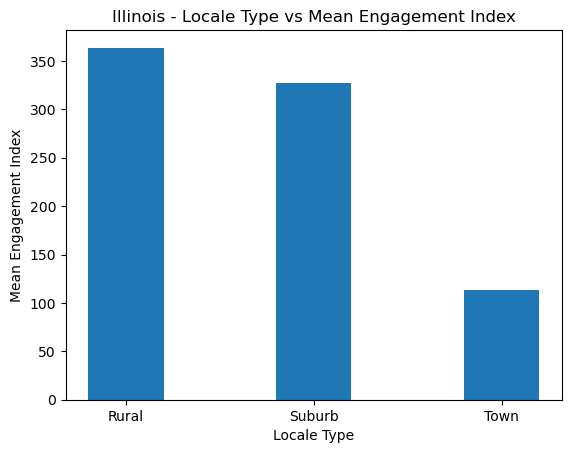

North Carolina locale means:
locale
City       56.183116
Rural     221.550527
Suburb    117.414871
Name: engagement_index, dtype: float64


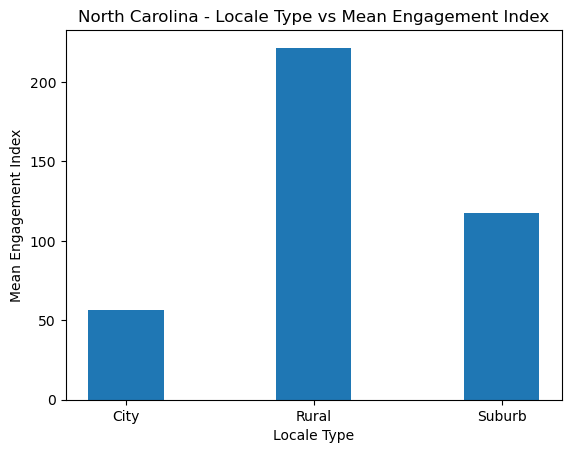

Washington locale means:
locale
City      148.538171
Suburb    130.444349
Name: engagement_index, dtype: float64


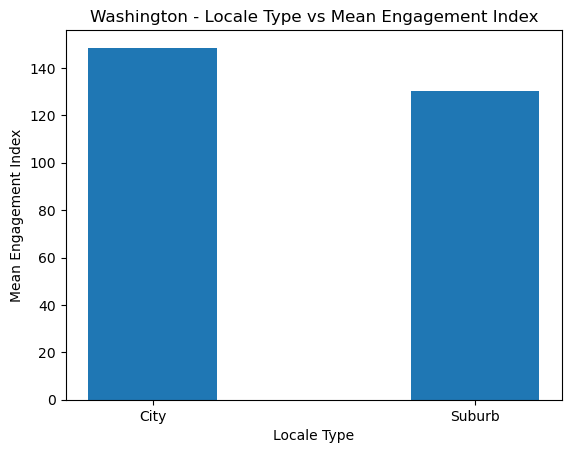

Connecticut locale means:
locale
City      216.174752
Rural     464.907895
Suburb    353.389459
Name: engagement_index, dtype: float64


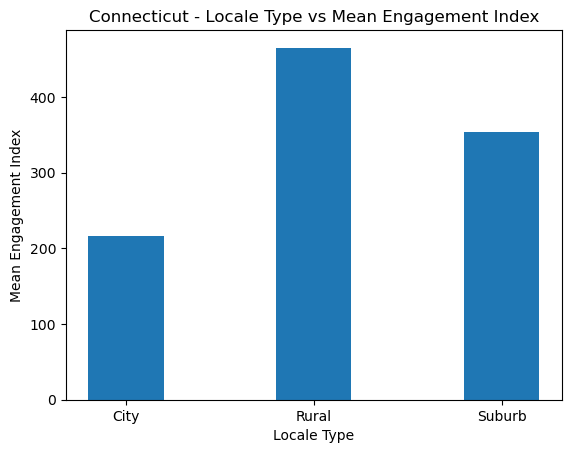

Indiana locale means:
locale
City      255.005977
Rural     396.134024
Suburb     99.661494
Town      375.376810
Name: engagement_index, dtype: float64


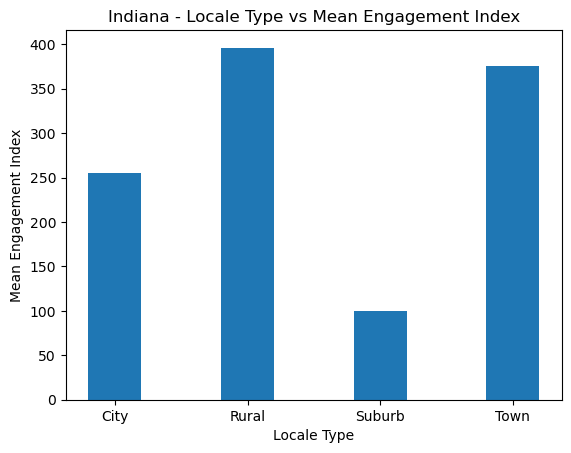

California locale means:
locale
City      178.510346
Rural     624.785775
Suburb    133.367685
Name: engagement_index, dtype: float64


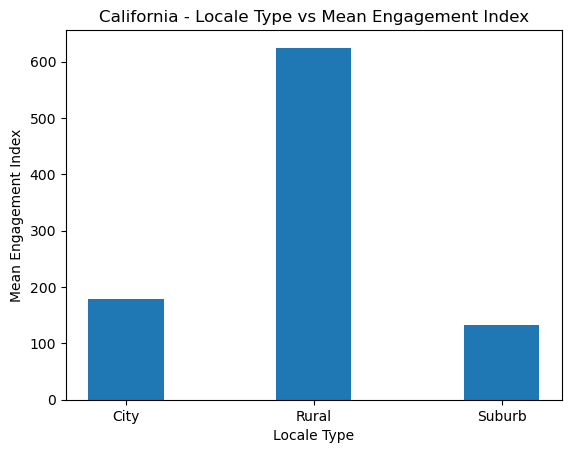

In [131]:
# Now we can investigate if there is any relationship between the locale/geographic region of a district and overall student engagement

# Loop through each state
for state in districts_data["state"].unique().tolist():

    # Get the state data from state_eng_data
    state_data = state_eng_data[state]

    # Merge with districts_data
    merged_data = pd.merge(districts_data[districts_data['state']==state], state_data, on='district_id')

    # Group by locale and calculate mean engagement index
    locale_means = merged_data.groupby('locale')['engagement_index'].mean()
    print(f"{state} locale means:")
    print(locale_means)

    # Create bar chart
    fig, ax = plt.subplots()
    ax.bar(locale_means.index, locale_means.values, width=0.4)
    ax.set_xlabel('Locale Type')
    ax.set_ylabel('Mean Engagement Index')
    ax.set_title(f'{state} - Locale Type vs Mean Engagement Index')
    plt.show()

From our analysis, the graphs suggest that there is a relationship between geographic region and overall student engagement. 

In Illinois, students from rural districts have the highest mean student engagement index values, followed by those from suburban districts and town districts. 

In North Carolina, students from rural districts have the highest mean engagement index values, followed by suburban districts and city districts.

In Washington, students from city districts have higher mean engagement index values compared to those from suburban districts. 

In Connecticut, students from rural districts have the highest mean engagement index values, followed by those from suburban and city districts.

In Indiana, students from rural districts have the highest mean engagement index values, followed by those from town districts, and city districts. Suburban districts have the lowest mean engagement index values.

In California, students from rural districts and town districts have significantly higher mean engagement index values compared to those from city and suburban districts.

Overall, this graphs suggest that rural districts tend to have higher student engagement with the online learning tools compared to that from other districts. These can be attributed to the fact that rural school districts may heavily rely on these tool to connect with students that may not be able to commute or learn in person. If other districts do not have consistent student engagement with the online learning tools, they may want to consider changing curriculum or policies to better integrate these tools to be more appealing and useful for students.


## Question 2: What are the top 3 products in each state? What is the overall trend in engagement index for these products in each state?

In [132]:
# Create an empty dictionary to store the results
top_products_states = {}

# Loop through each state in the state_eng_data dictionary
for state, eng_data in state_eng_data.items():
    
    # Aggregate the engagement data by product
    product_engagement = eng_data.groupby('lp_id')['engagement_index'].sum().reset_index()
    
    # Sort the products by their aggregated engagement index
    product_engagement = product_engagement.sort_values('engagement_index', ascending=False)
    
    # Select the top 3 products
    top_products = product_engagement.head(3)['lp_id'].tolist()

    # Select the top 10 products and their engagement indexes and store them
    top_10_products_data = product_engagement.head(10)
    
    # Get the names of the top products from the product_data DataFrame
    top_product_names = product_data.loc[product_data['LP ID'].isin(top_products), 'Product Name'].tolist()
    
    # Create a dataframe with the results for the current state
    state_df = pd.DataFrame({'State': [state] * len(top_products),
                             'Rank': range(1, len(top_products)+1),
                             'LP ID': [int(lp_id) for lp_id in top_products],
                             'Product Name': top_product_names})
    
    # Store the results for the current state in the dictionary
    top_products_states[state] = state_df
    print(state_df)
    print("\n")


      State  Rank  LP ID      Product Name
0  Illinois     1  95731       Google Docs
1  Illinois     2  32213           YouTube
2  Illinois     3  61292  Google Classroom


            State  Rank  LP ID      Product Name
0  North Carolina     1  95731            Canvas
1  North Carolina     2  47364       Google Docs
2  North Carolina     3  32213  Google Classroom


        State  Rank  LP ID      Product Name
0  Washington     1  95731       Google Docs
1  Washington     2  32213           YouTube
2  Washington     3  61292  Google Classroom


         State  Rank  LP ID      Product Name
0  Connecticut     1  95731       Google Docs
1  Connecticut     2  32213  Google Classroom
2  Connecticut     3  98845              Meet


     State  Rank  LP ID      Product Name
0  Indiana     1  95731       Google Docs
1  Indiana     2  32213           YouTube
2  Indiana     3  61292  Google Classroom


        State  Rank  LP ID      Product Name
0  California     1  95731       Google Docs


From this breakdown we can see that in each state Google Docs and Google Classroom are among the top 3 learning tools with the highest engagement index. This implies that these tools have become a universal standard for connecting students to online learning and increasing their productivity. Google Classroom is a web-based platform designed to help teachers create, distribute, and grade assignments, as well as communicate with students and manage their classes. Google Docs is a web-based word processing program offered by Google as part of its Google Drive service, allowing users to create, edit and collaborate on documents online in real-time. These products stand out from others as they are directly geared towards how students can coordinate and complete tasks for school work. Google Classroom is classified as a SDO - Learning Management Systems (LMS), whereas Google Docs is a LC - Content Creation & Curation. With this in mind, we may suggest that if school districts want to further diversify the learning tools they use and increase engagement, they should focus on tools that directly relate to helping students complete school tasks/work opposed to some other tools that are in the products list given to us that are geared towards recreational use (e.g Among Us and CoolMathGames)

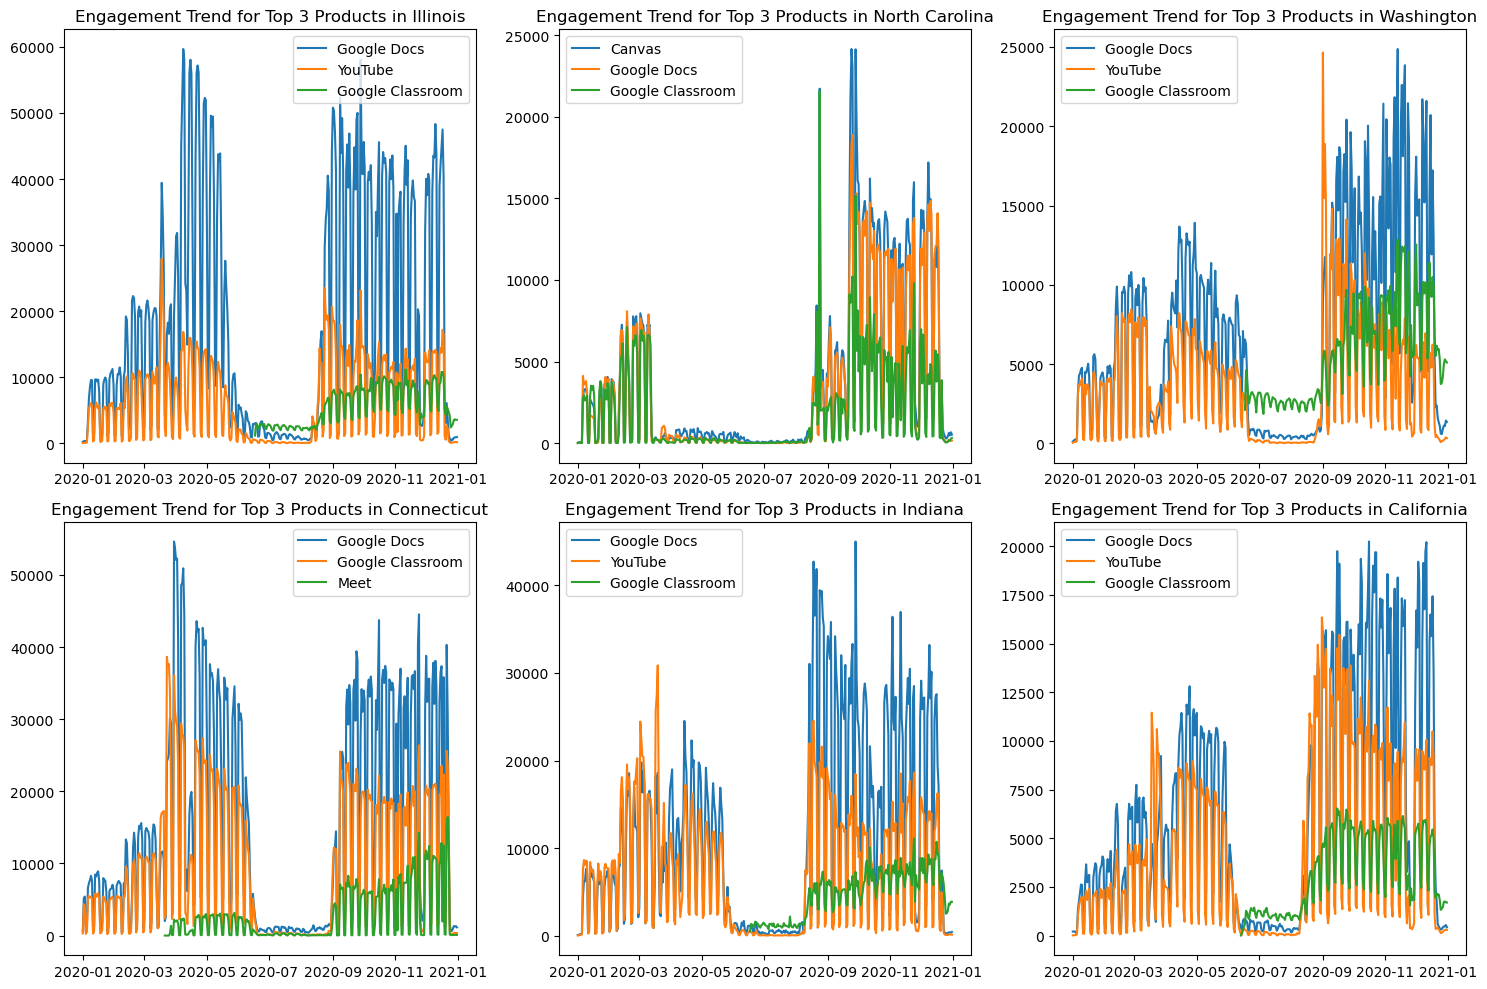

In [144]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Create an empty dictionary to store the trend dataframes
trend_data = {}

# Loop through each state in the top_products_states dictionary
for i, (state, eng_data) in enumerate(state_eng_data.items()):
    product_eng = eng_data[eng_data["lp_id"].isin(top_products_states[state]['LP ID'].tolist())]
    row = i//3
    col = i%3
    ax = axes[row][col]
    
    # Loop through each product in the top 3 products for the state
    for lp_id in top_products_states[state]['LP ID']:
        
        product_name = top_products_states[state].loc[top_products_states[state]['LP ID'] == lp_id, 'Product Name'].values[0]

        # Select the rows for the current product
        product_data = product_eng[product_eng['lp_id'] == lp_id]

        # Group the product data by date and calculate the mean engagement index
        product_data = product_data.groupby('time')['engagement_index'].mean().reset_index()

        # Create a line chart for the product
        ax.plot(product_data['time'], product_data['engagement_index'], label=product_name)
    
    # Add a title and legend to the chart
    ax.set_title(f'Engagement Trend for Top 3 Products in {state}')
    ax.legend()

plt.tight_layout()
plt.show()

To produce these graphs we aggregated the data for each product by the time recorded and the engagement index. This means that for all districts in a state, we take the average engagement index of a specific product at a specific date (i.e. mean engagement index of Google Docs on 2020-01-01 across all districts in Illinois).

In the graph for Illinois we can see that the average engagement index for Google Docs across all Illinois school districts was higher than the mean engagement index for the other products at any given month of 2020. This suggests that students regularly accessed Google Docs as a learning tool essential for their day-to-day school activities. Unlike other states, school districts in Illinois maintained frequent engagement index values for Youtube over the 2020 year. This suggests that video based learning was useful to some students in these school districts. This trend was seen in other states such as Washington, Indiana, California. The mean engagement index for Google Docs and Youtube were the two highest products over the 2020 year indicating that students across various states engage more with video based learning and software tools that can help them organize, complete, and share school work. 

In North Carolina, the mean engagement index for all of its top 3 products was relatively close over the 2020 year, with Canvas and Google Docs having the most engagement. Canvas is an online platform that offers free, open professional development courses. The engagement index trends for this state suggest that students in North Carolina school districts maintain frequent engagement with learning tools that can provide them with opportunities to learn remotely.

In Connecticut, Google Docs and Google Classroom were the products with the highest mean engagement index values over the 2020 year. School districts in this state also recorded high engagement with Meet, a service for secure, high-quality video meetings. This suggests that students in these school districts found the use of live video lectures engaging and important for learning during the 2020 year where schools were closed because of the COVID-19 pandemic. 

Between all the graphs, we can see a similar spike in engagement with all online tools around March of 2020, which is when the pandemic started and learning moved to online. Over the summer, students were away from school which is why there was a drop in engagement from June to August in 2020. When the next school year started in September, engagement with these online tools spiked heavily again, as majority of learning took place remotely and the use of online tools were more common in schools.

Overall this analysis suggests that institutions and school districts using our analysis should consider incorporating learning tools that assist students with remote learning and completing work online. Products like Google Docs, Canvas and Google Classroom allow students to stay connected with their school work outside of the classroom as they can track their progress in course, work and share documents with peers or access in class materials through these products. In conclusion, we suggest that in the future school districts should look to invest in online learning platforms as the COVID-19 pandemic illustrated the importance of alternative access to learning.

## Question 3: What is the distribution of products across different states and what effect does it have on engagement index?

In [134]:
# Reading the products_info.csv to get the primary essential function of the top products
product_pef = pd.read_csv("./Midterm/products_info.csv")

In [135]:
# Setting the name of the LP ID column in product_pef to lp_id so we can merge columns
product_pef = product_pef.rename(columns={'LP ID': 'lp_id'})

In [136]:
# Dictionary to host the state along with the count of each PR
states_PER_avgs = {}

# Loop through each state in the state_eng_data dictionary
for state, eng_data in state_eng_data.items():
    
    # Sort the products by their aggregated engagement index
    sorted_engagement = eng_data.sort_values('engagement_index', ascending=False)

    # Merge the sorted_engagement df with the product_pef df to get the corresponding Primary Essential Functions, rename to PER
    merged_df = sorted_engagement.merge(product_pef[['lp_id', 'Primary Essential Function']], on='lp_id', how='left')
    merged_df.dropna()
    merged_df.rename(columns={'Primary Essential Function': 'PER'}, inplace=True)

    # Group merged_df by PER and calculate mean of engagement index for each group
    per_engagement_mean = merged_df.groupby('PER')['engagement_index'].mean()

    # Create a dictionary with PER as key and mean engagement index as value
    per_engagement_dict = {per: engagement for per, engagement in per_engagement_mean.items()}

    # Adding the state and corresponding PER counts to the states_PER_count dictionary
    states_PER_avgs[state] = per_engagement_dict

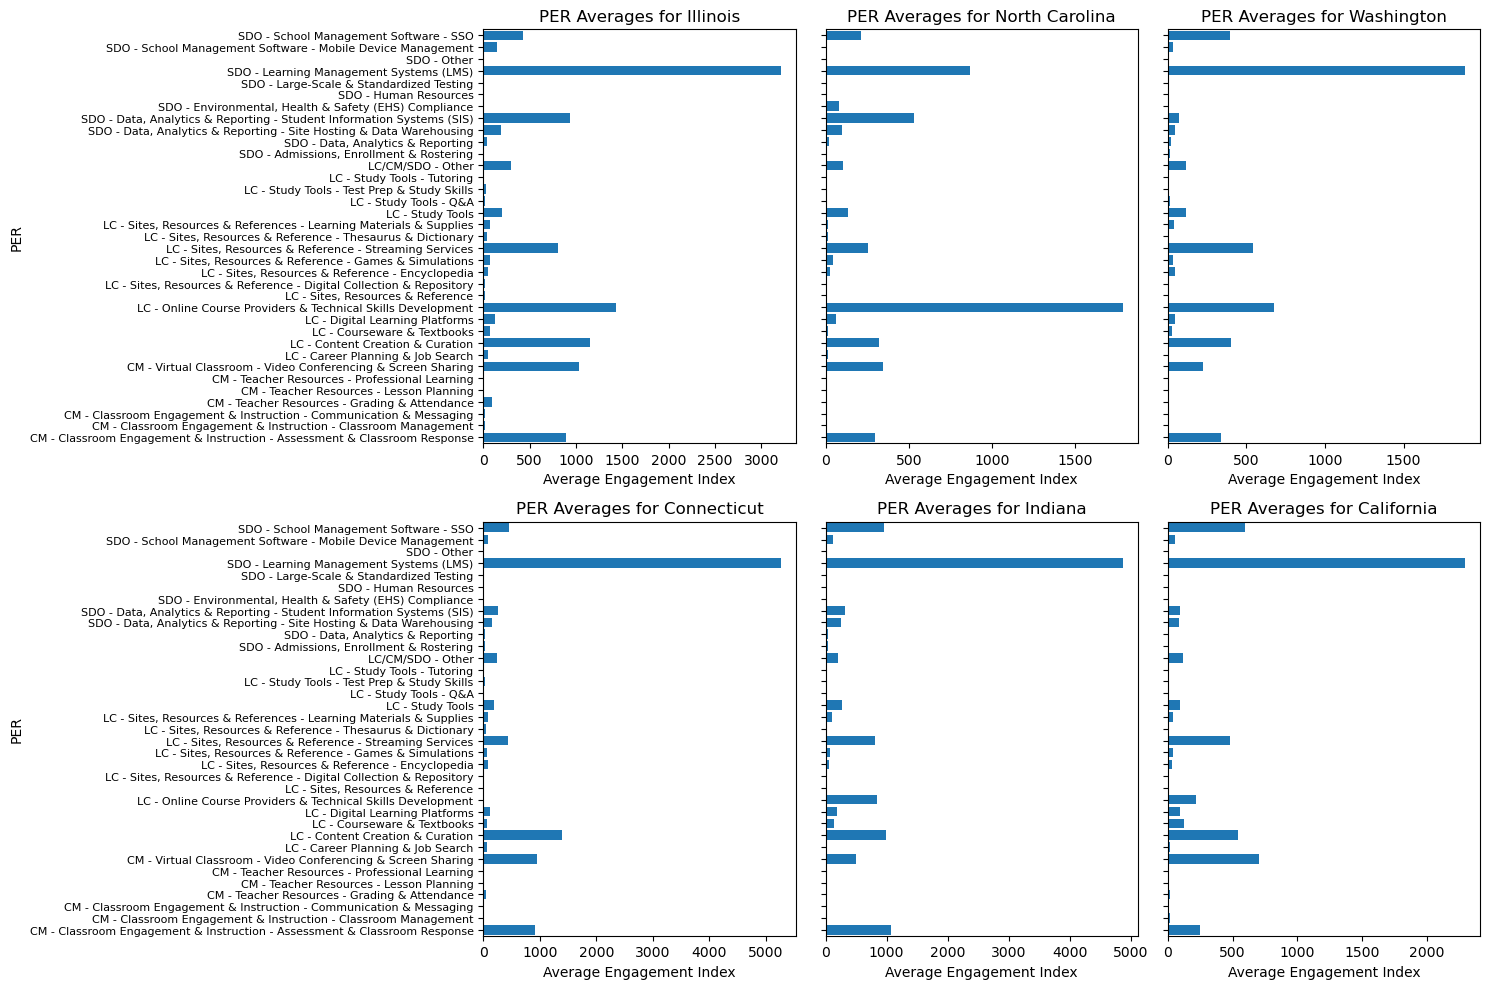

In [153]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each state and plot in a separate subplot
for i, state in enumerate(states_PER_avgs):
    row = i // 3
    col = i % 3

    # Get PER averages for the current state
    per_averages = states_PER_avgs[state]
    per_names = list(per_averages.keys())
    per_values = list(per_averages.values())

    # Create a horizontal bar graph
    ax = axs[row, col]
    ax.barh(per_names, per_values)
    ax.set_title(f"PER Averages for {state}")
    ax.set_xlabel("Average Engagement Index")
    if col == 0:
        ax.set_ylabel("PER")
        ax.set_yticks(np.arange(len(per_names)))
        ax.set_yticklabels(per_names, fontsize=8)
        ax.set_ylim(-0.5, len(per_names) - 0.5)
    else:
        ax.set_yticklabels([])
        ax.set_ylim(-0.5, len(per_names) - 0.5)

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the figure
plt.show()

By analyzing the above data for each state, we find that there is great variation between the average engagement indexes of for the primary essential functions of online tools.

Between all 6 states, **SDO - Learning Management Systems (LMS)** are the type of product with either the highest engagement index or the second highest engagement index. This is due to that many learning environments within all modernized education institutions utilize services like *Moodle* or *Google Classroom* to manage the output of classroom data, such as assignments students will need to complete, posts made by students or teachers to uphold communication or grades on completed assessments.

In the above graphs however, some variation in online tool engagement exists, such as the extensive use of **LC - Online Course Providers & Technical Skills Development tools in North Carolina**, in which the average engagement index far surpasses that of any other type of online tool amongst all districts in the state. However, with the same type of online tool in **Connecticut**, the engagement index is near non-existent. This could be due to a number of reasons. For one, the North Carolina education system may have secondary schools and Universities that offer a larger variety of online courses where students can learn the same content remotely. However, the largest deciding factor seems to be that there are laws in place in North Carolina where districts decide on a day-to-day basis whether schools will close or move to remote instruction, while in Connecticut districts decide at the beginning of the year if learning will be remote, and there must be probable cause to make that change.

Similarly, we can see that **CM - Virtual Classroom - Video Conferencing & Screen Sharing** and **SDO - School Management Software - SSO** services both have a generally high engagement index amongst all states, which could have been a direct cause of the COVID-19 pandemic. This is because **School Management Software** spikes in usage when the pandemic started as all learning switched to remote and districts had to find a way to maintain a school environment while students were at home, so software like *PowerSchool SIS* and *Gradelink* were used.

With **Virtual Classroom** and **Video Conferencing & Screen Sharing** software such as *Microsoft Teams*, *Google Meets*, and *Zoom*, with the switch to remote learning this type of product spiked in usage, as professors and teachers were forced to conduct lectures and lessons virtually, while enforcing students to complete assignments and main active engagement in the classroom.

### The Dependance on State Regulation

The engagement indexes of different online products offered heavily varied between states, as districts had to abide by state laws regarding education especially during the switch to online learning during the COVID-19 Pandemmic, meaning the engagement for the type of tool was directly dependant on how the state allows districts to navigate the education they provide. When online tool providers look at this data, they may have to distribute/advertise products according to the demographic of the districts as well as the state education regulations in place for online learning. Companies like *Google* and *Microsoft* have a variety of types of online tools that are used across all states within the U.S. as they cater towards the general need amongst states and advertise based on which softwares are permitted for influencing education.

## Question 4: How does student engagement change throughout the stages of the pandemic; how will this pattern apply to the new age of learning?

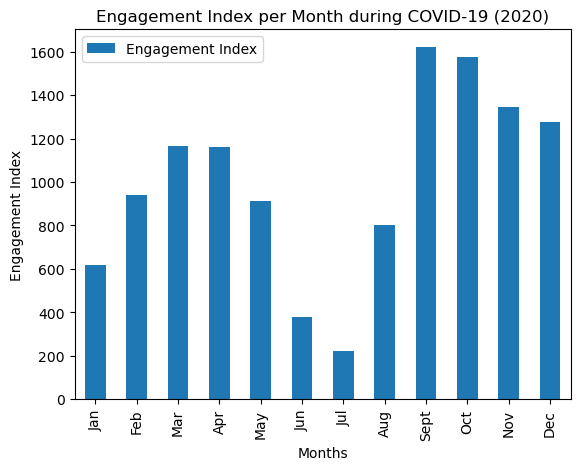

In [138]:
# Time and Engagement sum
time_and_engagement = 0

# Collect the mean engagement index for each state and add to sum
for state in states_of_interest:
    state_data = state_eng_data[str(state)]
    state_data = state_data.groupby('time')['engagement_index'].mean()
    time_and_engagement = time_and_engagement + state_data 

# Find average for each date
for i in range(0,time_and_engagement.size):
    time_and_engagement[i] = time_and_engagement[i]/6

# Mean engagement index per month
sums = time_and_engagement.resample('M').sum()
averages = sums.div(6)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_and_engagement = {}

# Plotting the graph
for i in range(0, len(months)):
    month_and_engagement[months[i]] = averages[i]

df = pd.DataFrame.from_dict(month_and_engagement, orient='index', columns=['Engagement Index'])
plot = df.plot(kind='bar')
plot.set_title('Engagement Index per Month during COVID-19 (2020)')
plot.set_xlabel('Months')
plot.set_ylabel('Engagement Index')
plt.show()

### Changes in Student Engagement throughout the Pandemic
We can subset the timelime from March to December, where the lockdown was in place, into three phases:

1. Initial Lockdown: (February - June)
2. Summer Break (June - August)
3. Online School Curriculumn (August - December)

In **phase 1**, we see that student engagement starts *increasing* in February since the news of the pandemic is spreading and some schools may have started implementing more online resources. Then in March, it *grows* higher and starts *dropping* after April. Its lowest point is below *400* in June. Engagement *being less than 400* is reasonable since June is the start of the summer break. But the overall trend here is that the engagement *starts high, then drops*.

In **phase 2**, the engagement is low since students are on summer break. In August, the engagement is high. This is because some school districts start their school year in August instead of September, states like Illinois, Indiana and North Carolina. During this phse, lockdown was still prevalent in the states, giving ample time for teachers to start developing and implementing an online school curriculumn.

In **phase 3**, the engagement index startes increasing in August and then doubles what in September. This is reasonable as this is when most schools start throughout the United States. Given that lockdown is still happening, all schools are following some sort of online school model with many online resources. October is relatively high as well, then the engagement starts dropping after October. December would have the lowest engagement partly due to it having winter breaks/holidays where students are not in class. The overall trend here is the *engagement index grows and then drops*

Throughout the phases, we see that phase 1 and phase 3 follow a **similar pattern** where at the start of the semesters, the engagement index grows and reaches an all-time high, then falls later throughout the semester. Although phase 1 and 3 follow the same pattern, phase 3 has larger values because teachers were more prepared of what technologies were going to be used and implemented in the curriculumn. The cause of student engagement decreasing seems natural due to the fact that the engagement declined during the later parts of both phases. This can be caused by many factors outside the student's control such as extra-curricular activities, homework/assignments, and tests/exams.

### New Age Of Learning

This new pattern doesn't deviate from the patterns we had before lockdown. The engagment indexes for years after lockdown for each month would follow the same pattern but at a lower rate since there wouldn't be a big focus on implementing online school. We can see that Phase 3 is an inflated pattern of Phase 1 since Phase 3 is when teachers and students had more access to online resources and materials and teachers had a plan to implement these resources in their classroom. Due to an increase of demand in educational technologies like the ones mentioned in the above analysis, we can expect the engagement indexes for the years after the pandemic to follow a similar pattern, but maybe at a lesser rate due to the extreme case of using only online tools during the pandemic.

### Null Hypothesis

In [152]:
# Define the null hypothesis
null_hypothesis = "The mean monthly engagement for the first half of the year is not significantly different from the mean monthly engagement for the second half of the year."
alternative_hypothesis = "The mean monthly engagement for the first half of the year is significantly different than the mean monthly engagement of the second half of the year."

# Extract the engagement values from the dictionary
engagement_values = np.array(list(month_and_engagement.values()))

# Calculate the mean engagement for the first half of the year (Jan - Jun)
mean_engagement_first_half = np.mean(engagement_values[:6])

# Calculate the mean engagement for the second half of the year (Jul - Dec)
mean_engagement_second_half = np.mean(engagement_values[6:])

# Print the null hypothesis
print("Null hypothesis:", null_hypothesis)
print("Alternative hypothesis:", alternative_hypothesis)
print("Mean engagement for the first half of the year:", mean_engagement_first_half)
print("Mean engagement for the second half of the year:", mean_engagement_second_half)
print("Therefore the null hypothesis is incorrect, proving the alternative hypothesis.")

Null hypothesis: The mean monthly engagement for the first half of the year is not significantly different from the mean monthly engagement for the second half of the year.
Alternative hypothesis: The mean monthly engagement for the first half of the year is significantly different than the mean monthly engagement of the second half of the year.
Mean engagement for the first half of the year: 862.9397688254852
Mean engagement for the second half of the year: 1141.0648112896827
Therefore the null hypothesis is incorrect, proving the alternative hypothesis.


*This means that the null hypothesis is incorrect, as the student engagement levels increased by 25% after the second half of the year. This proves the alternative hypothesis, which is that the mean monthly engagement for the first half of the year is significantly different than the mean monthly engagement of the second half of the year*.